   # Apollo_CaseStudy

# About Apollo

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.

As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.

One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

# Business Problem

The company wants to know:
* Which variables are significant in predicting the reason for hospitalization for different regions
* How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

# Dataset

Column Profiling

* Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are                generally covered by the government).
* Sex: This is the policy holder's gender, either male or female
* Viral Load: Viral load refers to the amount of virus in an infected person's blood
* Severity Level: This is an integer indicating how severe the patient is
* Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.
* Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast,             southwest, or northwest
* Hospitalization charges: Individual medical costs billed to health insurance


In [1]:
# Analysis
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime
import calendar

In [2]:
df=pd.read_csv('scaler_apollo_hospitals.csv')
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [3]:
df.shape

(1338, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [5]:
df.isnull().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

# Observations

* there are no missing values present in Provided Data.

In [6]:
# Dropping unnamed Columns
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [9]:
df.shape

(1338, 7)

# Types Of Variables:

* Categorical  :   Sex,smoker,region
* Numerical    :   age,viral load,severity level,hospitalization charges.

In [11]:
#number of unique values in our data
for i in df.columns:
    print(i,":", df[i].nunique())

age : 47
sex : 2
smoker : 2
region : 4
viral load : 462
severity level : 6
hospitalization charges : 1320


In [12]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [14]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df['severity level'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

# Observations:

* Two Unique values are present in sex and smoker column.
* Total 4 unique region's data is present.
* Sevrity level is divided as 6 severity level based on their condition.
* No missing Values and we can start Analysis Further like EDA and Hypothesis Testing.

# Univariate Analysis

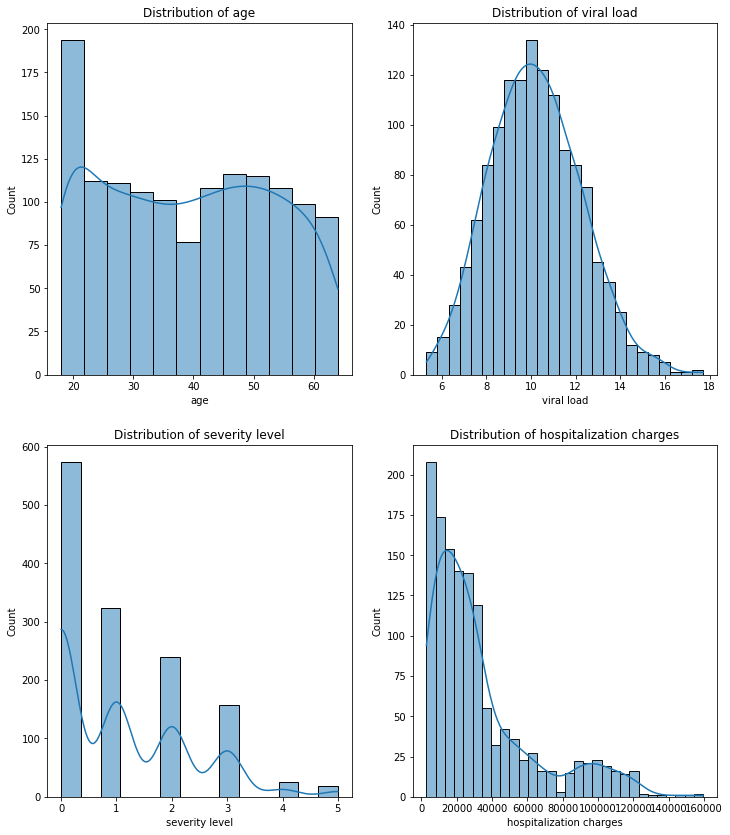

In [19]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="age", kde=True, ax=axis[0,0])
axis[0,0].set_title('Distribution of age')
sns.histplot(data=df, x="viral load", kde=True, ax=axis[0,1])
axis[0,1].set_title('Distribution of viral load')
sns.histplot(data=df, x="severity level", kde=True, ax=axis[1,0])
axis[1,0].set_title('Distribution of severity level')
sns.histplot(data=df, x="hospitalization charges", kde=True, ax=axis[1,1])
axis[1,1].set_title('Distribution of hospitalization charges')
plt.show()

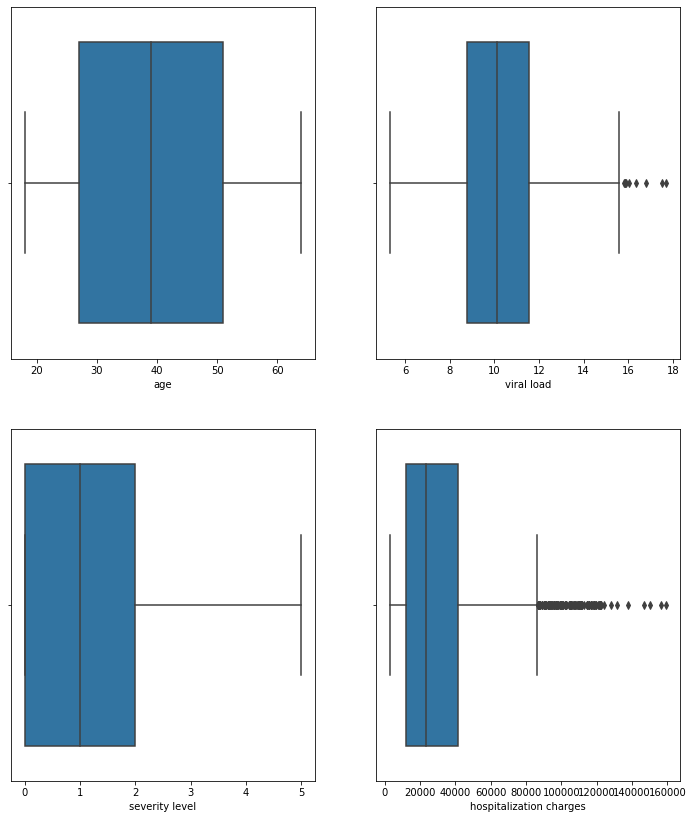

In [20]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="age", ax=axis[0,0])
sns.boxplot(data=df, x="viral load", ax=axis[0,1])
sns.boxplot(data=df, x="severity level", ax=axis[1,0])
sns.boxplot(data=df, x="hospitalization charges", ax=axis[1,1])
plt.show()

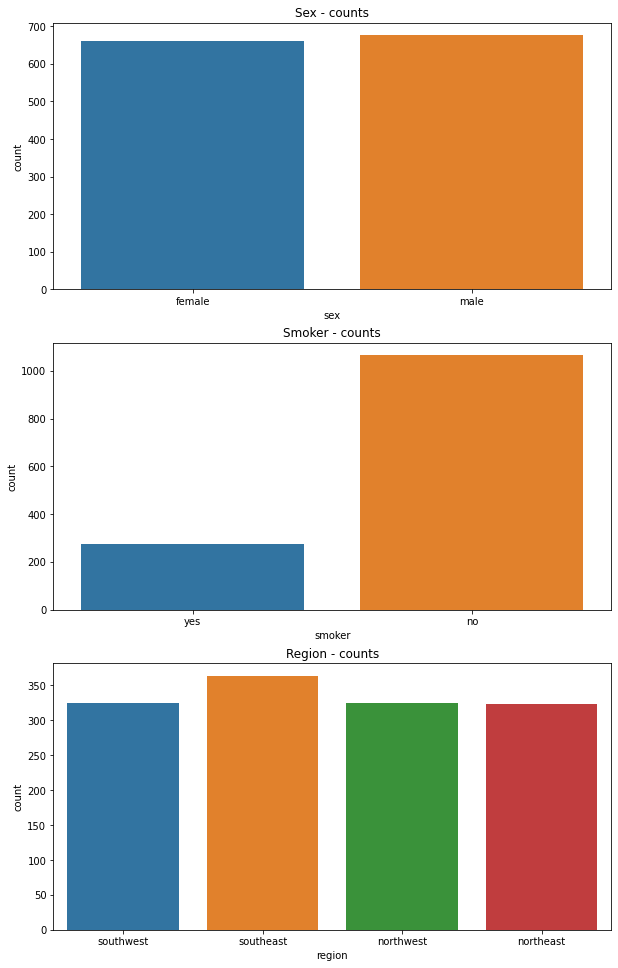

In [32]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
fig.subplots_adjust(top=1.7)

sns.countplot(data=df, x="sex", ax=axis[0]).set(title='Sex - counts')
sns.countplot(data=df, x="smoker", ax=axis[1]).set(title='Smoker - counts')
sns.countplot(data=df, x="region", ax=axis[2]).set(title='Region - counts')
plt.show()

# Observations:

* Age and severity level doesn't have any outliers
* viral load and hospitalization charges had some outliers.
* Dataset contains slightly more of male data.
* Majority of patients are non smoker according to data.
* More data is from SouthEast region.

# Bivariate Analysis

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

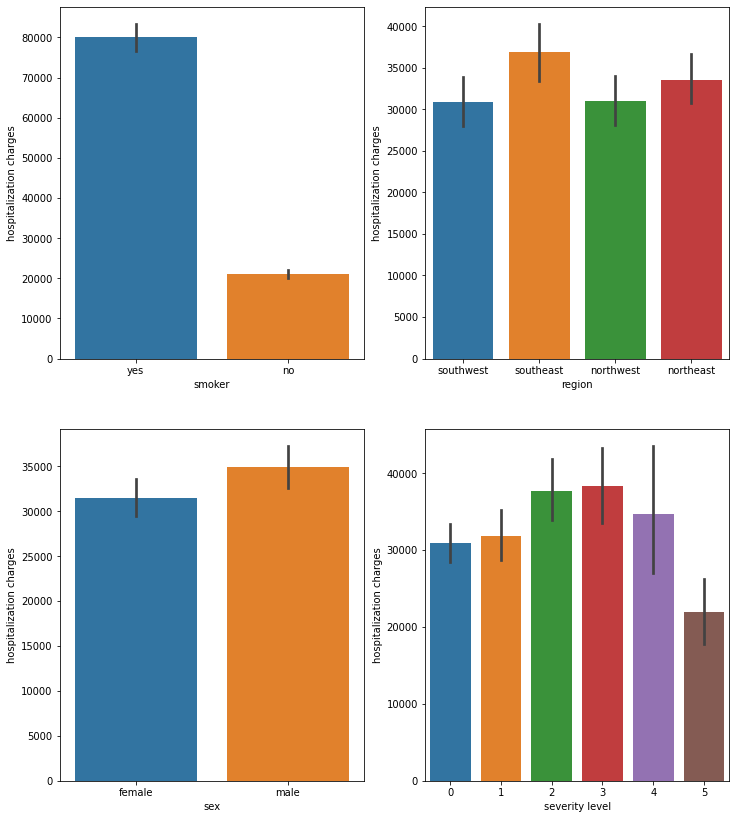

In [37]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.barplot(x='smoker', y='hospitalization charges', data=df, ax=axis[0,0])
sns.barplot(x='region', y='hospitalization charges', data=df, ax=axis[0,1])
sns.barplot(x='sex', y='hospitalization charges', data=df, ax=axis[1,0])
sns.barplot(x='severity level', y='hospitalization charges', data=df, ax=axis[1,1])

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

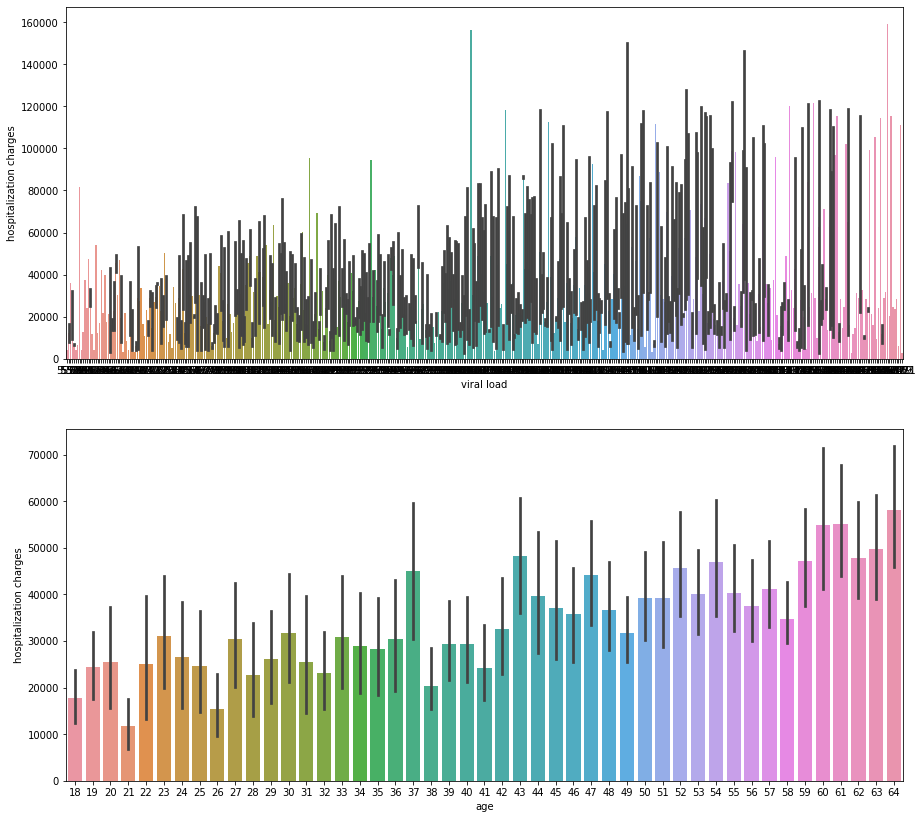

In [41]:
fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
fig.subplots_adjust(top=1.2)

sns.barplot(x='viral load', y='hospitalization charges', data=df, ax=axis[0])
sns.barplot(x='age', y='hospitalization charges', data=df, ax=axis[1])

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

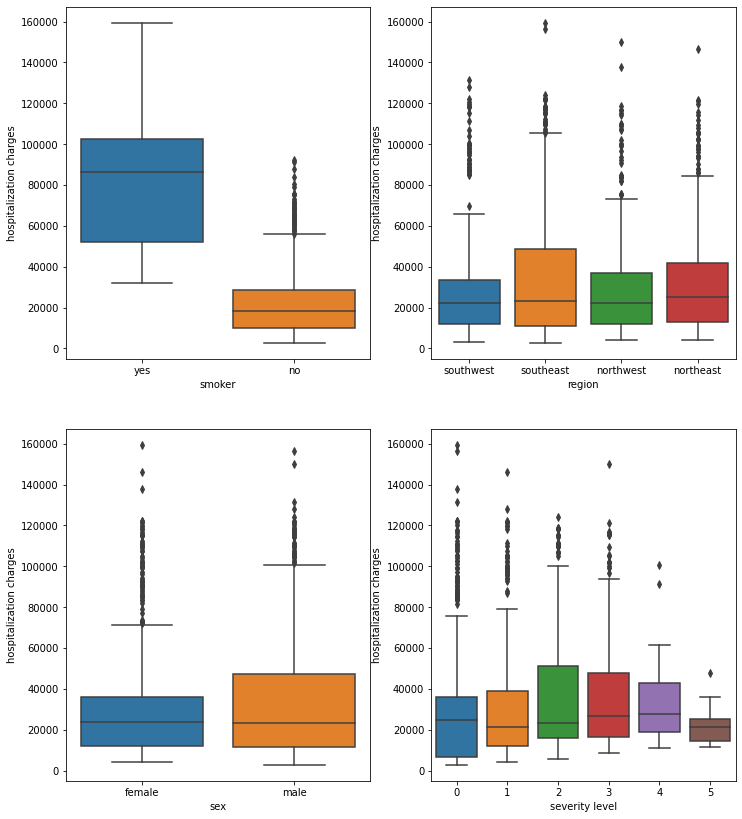

In [42]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(x='smoker', y='hospitalization charges', data=df, ax=axis[0,0])
sns.boxplot(x='region', y='hospitalization charges', data=df, ax=axis[0,1])
sns.boxplot(x='sex', y='hospitalization charges', data=df, ax=axis[1,0])
sns.boxplot(x='severity level', y='hospitalization charges', data=df, ax=axis[1,1])

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

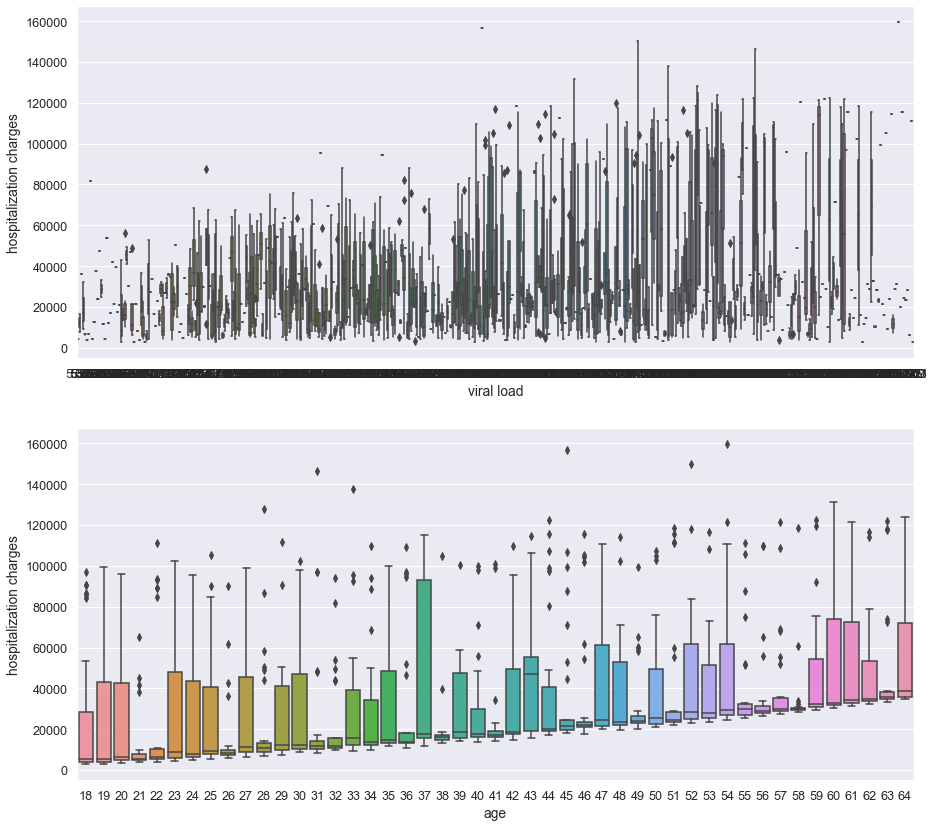

In [147]:
fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(x='viral load', y='hospitalization charges', data=df, ax=axis[0])
sns.boxplot(x='age', y='hospitalization charges', data=df, ax=axis[1])

# Observations:

* If patient smokes then likely that patient Hospitalization charges will be higher.
* If patient age is more then hospitalization charges will be higher.
* If patient's age increases then hospitilization chargers also increases.
* In NorthEast Region, average of hospitilization charges are slightly more than other regions.
* Hospitalization charges also incrases with severity level increases.
* There is no difference in Average of Hospitilization charges based on gender(it is same in both male and female).
* There are some Outliers in some sections which will be removed during Hypothesis Testing.

# Multivariate Analysis

In [44]:
## correlation matrix for heat map
df.corr()

,age,viral load,severity level,hospitalization charges
age,1.000000,0.109300,0.042469,0.299008
viral load,0.109300,1.000000,0.012729,0.198388
severity level,0.042469,0.012729,1.000000,0.067998
hospitalization charges,0.299008,0.198388,0.067998,1.000000


<AxesSubplot:>

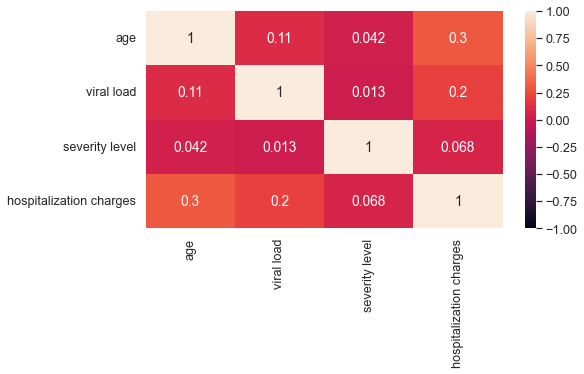

In [45]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)

In [46]:
## spearman correlation matrix for heat map, used for better understanding 
df.corr('spearman')

,age,viral load,severity level,hospitalization charges
age,1.000000,0.107743,0.056992,0.534391
viral load,0.107743,1.000000,0.015593,0.119487
severity level,0.056992,0.015593,1.000000,0.133342
hospitalization charges,0.534391,0.119487,0.133342,1.000000


<AxesSubplot:>

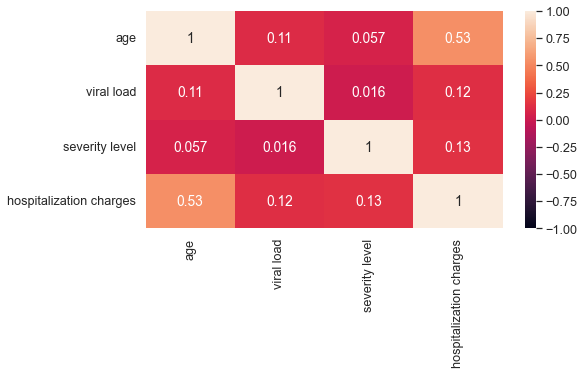

In [47]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(df.corr('spearman'),annot=True,vmin=-1, vmax=1)

# Observations:

* By Correlation Matrix we can see that Age and Hospitilization charges are slightly correlated.
* Not much we can get Insights from This Heatmap because all are correlated with small value.

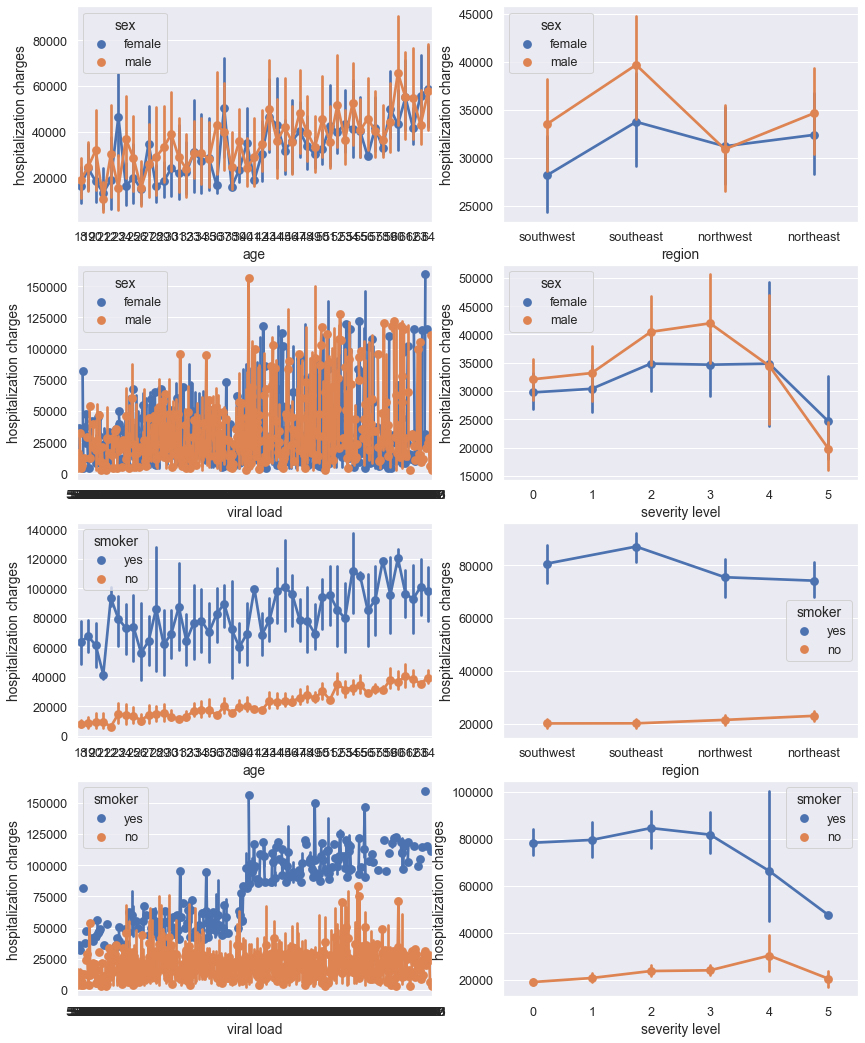

In [51]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.5)

sns.pointplot(x=df['age'], y=df['hospitalization charges'], hue=df['sex'],ax=axis[0,0])
sns.pointplot(x=df['region'], y=df['hospitalization charges'], hue=df['sex'],ax=axis[0,1])
sns.pointplot(x=df['viral load'], y=df['hospitalization charges'], hue=df['sex'],ax=axis[1,0])
sns.pointplot(x=df['severity level'], y=df['hospitalization charges'], hue=df['sex'],ax=axis[1,1])
sns.pointplot(x=df['age'], y=df['hospitalization charges'], hue=df['smoker'],ax=axis[2,0])
sns.pointplot(x=df['region'], y=df['hospitalization charges'], hue=df['smoker'],ax=axis[2,1])
sns.pointplot(x=df['viral load'], y=df['hospitalization charges'], hue=df['smoker'],ax=axis[3,0])
sns.pointplot(x=df['severity level'], y=df['hospitalization charges'], hue=df['smoker'],ax=axis[3,1])
plt.show()

# Observations

* Severity level is more for smokers comparitive to non smokers.
* Irrespective of region is patient smokes then hospitilization charges are more than non smokers.
* Even in Viral load we can see that in smokers are more affected with more viral load than non smokers.
* Even in irrespetive of age, smokers are paying more hospital charges. 
* In case of Gender we can't come to some insights as hospital charges are not related to gender.

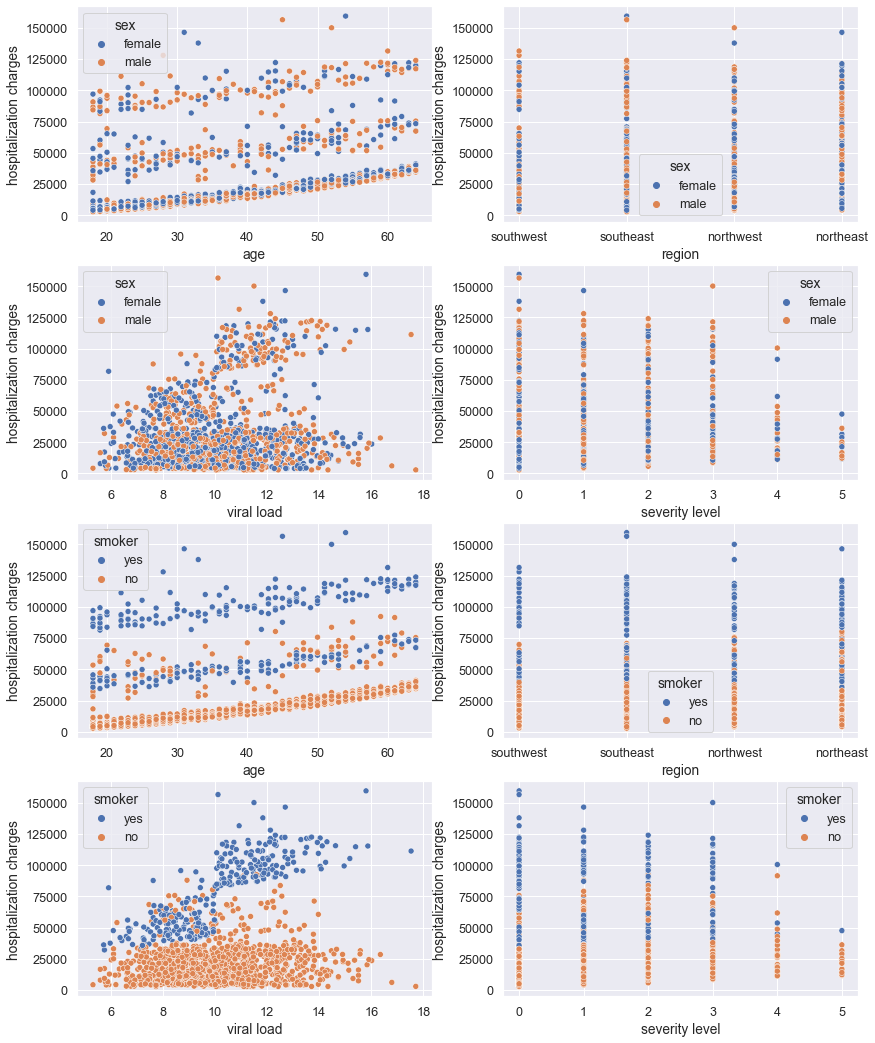

In [49]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.5)

sns.scatterplot(x=df['age'], y=df['hospitalization charges'], hue=df['sex'],ax=axis[0,0])
sns.scatterplot(x=df['region'], y=df['hospitalization charges'], hue=df['sex'],ax=axis[0,1])
sns.scatterplot(x=df['viral load'], y=df['hospitalization charges'], hue=df['sex'],ax=axis[1,0])
sns.scatterplot(x=df['severity level'], y=df['hospitalization charges'], hue=df['sex'],ax=axis[1,1])
sns.scatterplot(x=df['age'], y=df['hospitalization charges'], hue=df['smoker'],ax=axis[2,0])
sns.scatterplot(x=df['region'], y=df['hospitalization charges'], hue=df['smoker'],ax=axis[2,1])
sns.scatterplot(x=df['viral load'], y=df['hospitalization charges'], hue=df['smoker'],ax=axis[3,0])
sns.scatterplot(x=df['severity level'], y=df['hospitalization charges'], hue=df['smoker'],ax=axis[3,1])
plt.show()

# Observations

* Severity level is more for smokers comparitive to non smokers.
* Irrespective of region is patient smokes then hospitilization charges are more than non smokers.
* Even in Viral load we can see that in smokers are more affected with more viral load than non smokers.
* Even in irrespetive of age, smokers are paying more hospital charges. 
* In case of Gender we can't come to some insights as hospital charges are not related to gender(by seeing scatter points).

# Hypothesis Testing

# Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)


# Step 1: Define Null & Alternate Hypothesis

*  H0 : The Hospitalization of people who smoke and doesn't smoke are same.
*  Ha : The Hospitalization of people who smoke is greater than who  doesn't smoke.
*  alpha = 0.05


# Step 2: Validate the assumptions

* Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
* Data in each group must be obtained via a random sample from the population.
* Data in each group are normally distributed.
* Data values are continuous.
* The variances for the two independent groups are equal.


# Checking assumptions of the test (Normality, Equal Variance)

In [52]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [53]:
df['smoker'].value_counts(normalize = True) * 100

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

In [71]:
smoker_data = df[df['smoker'] == 'yes'].sample(250)
not_smoker_data = df[df['smoker'] == 'no'].sample(250)

In [79]:
var_smoking=np.std(smoker_data['hospitalization charges'])**0.5
var_smoking

170.14424815743052

In [78]:
var_non_smoking=np.std(not_smoker_data['hospitalization charges'])**0.5
var_non_smoking

124.40822307410424

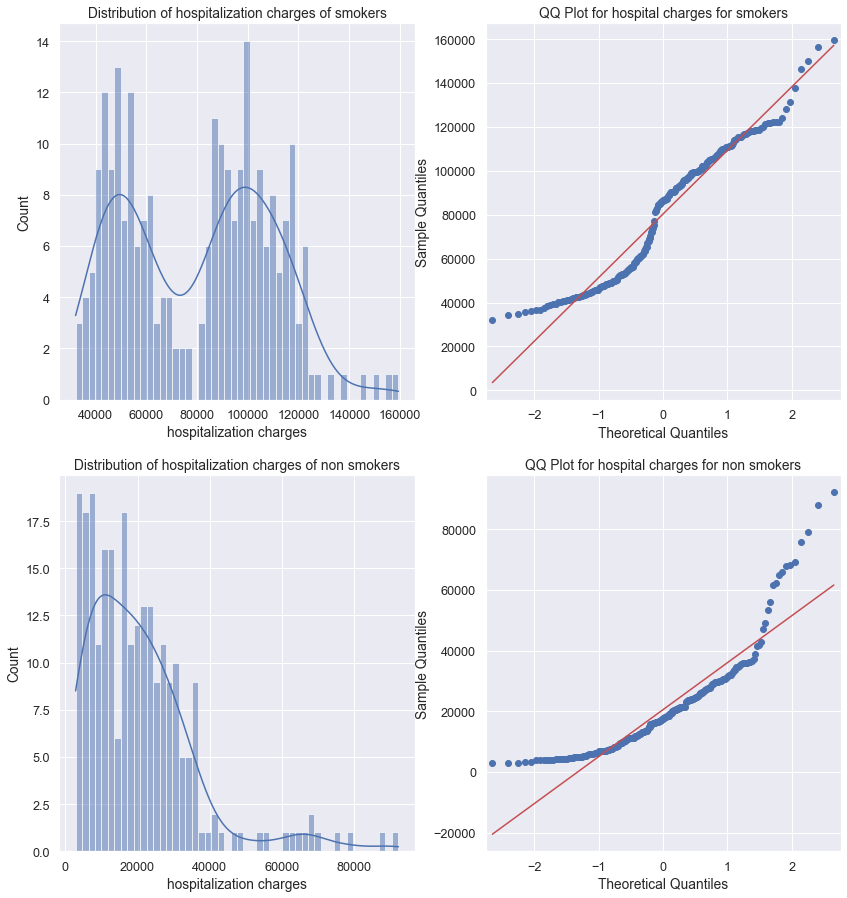

In [91]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14,4))
fig.subplots_adjust(top=3)

# smoker data
sns.histplot(data=smoker_data,x='hospitalization charges',bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of hospitalization charges of smokers')
sm.qqplot(smoker_data['hospitalization charges'], line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for hospital charges for smokers')

# Non smoker data
sns.histplot(data=not_smoker_data,x='hospitalization charges',bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of hospitalization charges of non smokers')
sm.qqplot(not_smoker_data['hospitalization charges'], line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for hospital charges for non smokers')

plt.show()

# Observations

* Variance is not same for both the data.
* Even Distributions are not normal as we can see in QQ plot.
* so applying np.log for the data to match variance.

In [80]:
var_smoking=np.std(np.log(smoker_data['hospitalization charges']))**0.5
var_smoking

0.6234974108735851

In [81]:
var_smoking=np.std(np.log(not_smoker_data['hospitalization charges']))**0.5
var_smoking

0.8667001211549068

In [82]:
# Levene's Test
stats.levene(np.log(smoker_data['hospitalization charges']), np.log(not_smoker_data['hospitalization charges']))

LeveneResult(statistic=69.9494071845495, pvalue=6.150279546164211e-16)

In [83]:
# shapiro-wilk Test
stats.shapiro(np.log(smoker_data['hospitalization charges']))

ShapiroResult(statistic=0.9298406839370728, pvalue=1.63174651568454e-09)

In [84]:
# shapiro-wilk Test
stats.shapiro(np.log(not_smoker_data['hospitalization charges']))

ShapiroResult(statistic=0.9787876009941101, pvalue=0.0008601145818829536)

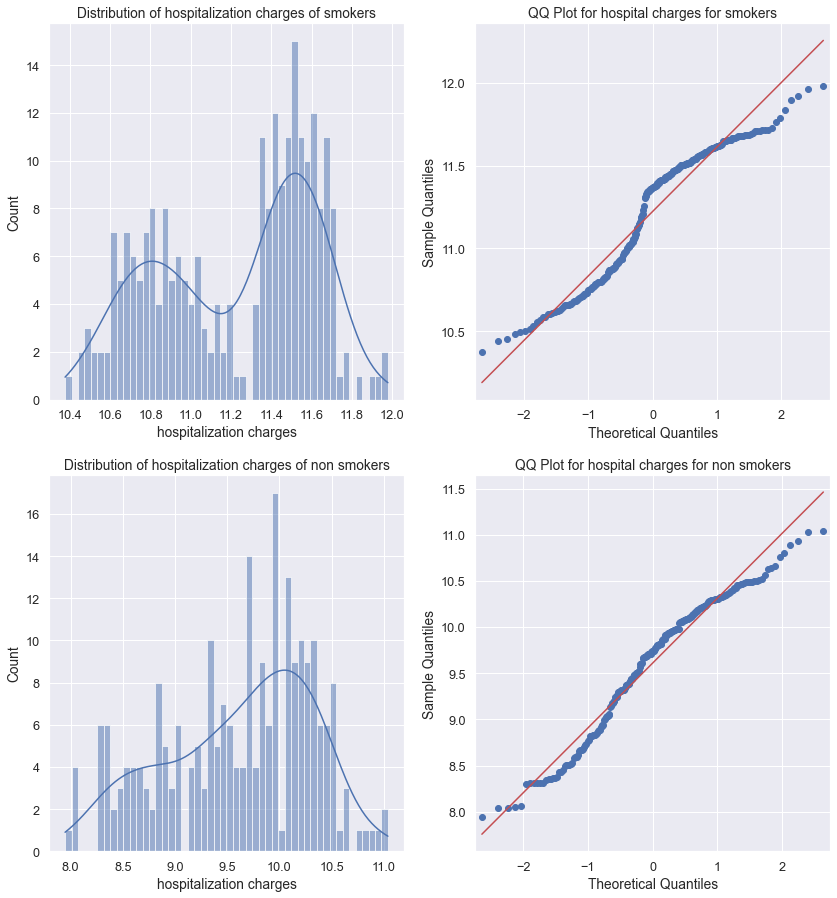

In [107]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14,4))
fig.subplots_adjust(top=3)

# smoker data
sns.histplot(data=np.log(smoker_data['hospitalization charges']),bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of hospitalization charges of smokers')
sm.qqplot(np.log(smoker_data['hospitalization charges']), line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for hospital charges for smokers')

# Non smoker data
sns.histplot(data=np.log(not_smoker_data['hospitalization charges']),bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of hospitalization charges of non smokers')
sm.qqplot(np.log(not_smoker_data['hospitalization charges']), line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for hospital charges for non smokers')

plt.show()

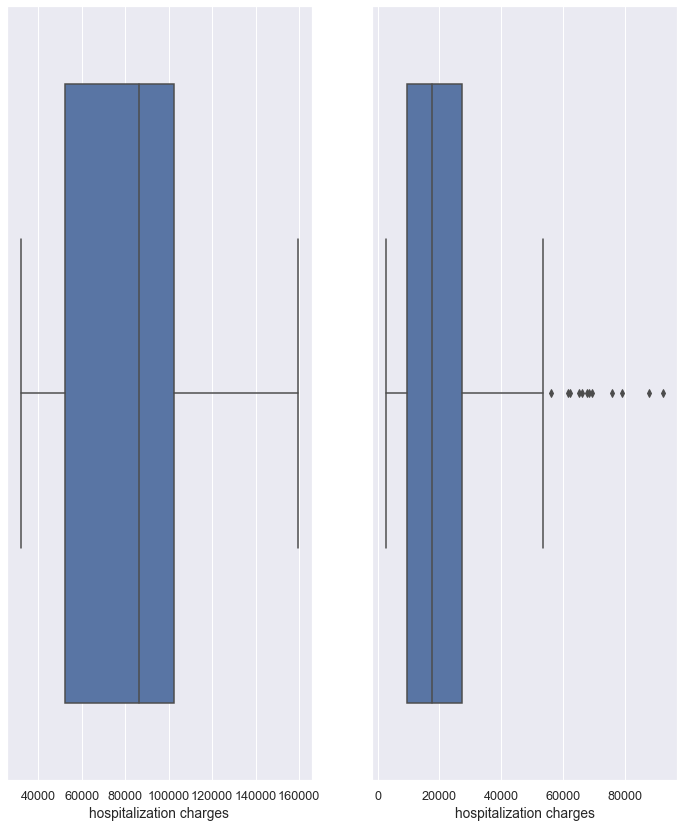

In [92]:
#Box plot for detecting outliers

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=smoker_data, x="hospitalization charges", ax=axis[0])
sns.boxplot(data=not_smoker_data, x="hospitalization charges", ax=axis[1])
plt.show()

In [93]:
q1=not_smoker_data['hospitalization charges'].quantile(0.25)
q3=not_smoker_data['hospitalization charges'].quantile(0.75)
iqr=q3-q1

In [103]:
not_smoker_data=not_smoker_data[(not_smoker_data['hospitalization charges']<=q3+2*iqr) & 
                                (not_smoker_data['hospitalization charges']>=q1-2*iqr)]

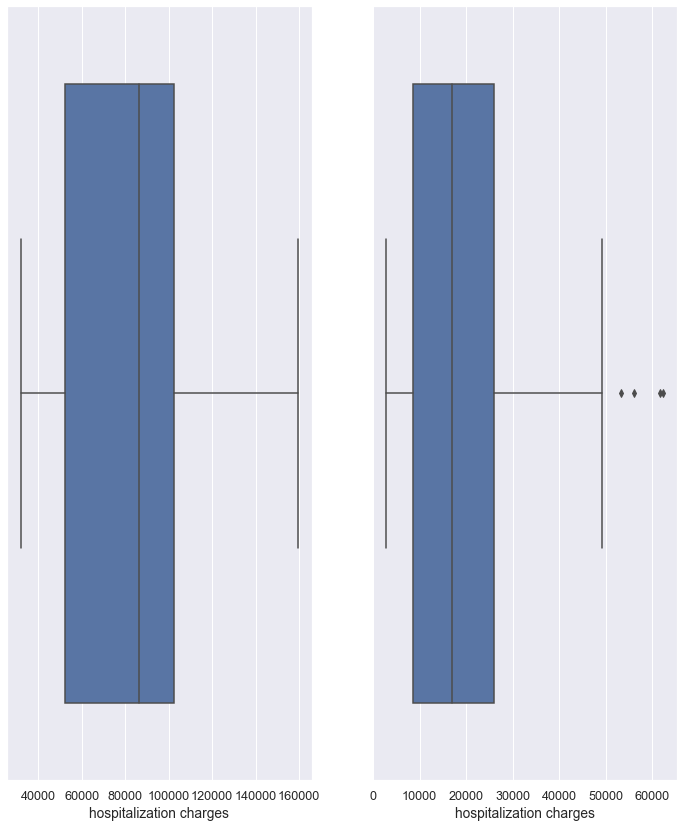

In [104]:
#Box plot for detecting outliers

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=smoker_data, x="hospitalization charges", ax=axis[0])
sns.boxplot(data=not_smoker_data, x="hospitalization charges", ax=axis[1])
plt.show()

# Observations:

1. Now both the distributions are similar to normal
2. variances are equal by levene test.
3. According to Shapiro wilk test both the data come from normal distribution of data due to p value is less than 0.5
3. now we are ready to apply T test on log data.

# Testing

In [112]:
t_test, p_value = stats.ttest_ind(np.log(smoker_data['hospitalization charges']), 
                                  np.log(not_smoker_data['hospitalization charges']),alternative='greater')
t_test, p_value

(31.59887947582545, 1.6338591980597466e-120)

In [113]:
def HTResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS') 

In [114]:
HTResult(p_value)

Reject NULL HYPOTHESIS



# Conclusion : 

1. As the p value < alpha(0.05) , we reject H0 
2. Thus we can say that the Hospitalization of people who smoke is greater than who doesn't smoke.

# Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)


# Step 1: Define Null & Alternate Hypothesis

*  H0 : The Viral load of females and males are same.
*  Ha : The Viral load of females and males are not same.
*  alpha = 0.05


# Step 2: Validate the assumptions

* Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
* Data in each group must be obtained via a random sample from the population.
* Data in each group are normally distributed.
* Data values are continuous.
* The variances for the two independent groups are equal.


# Checking assumptions of the test (Normality, Equal Variance)

In [116]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [118]:
df['sex'].value_counts(normalize = True) * 100

male      50.523169
female    49.476831
Name: sex, dtype: float64

In [119]:
male_data = df[df['sex'] == 'male'].sample(500)
female_data = df[df['sex'] == 'female'].sample(500)

In [121]:
var_male=np.std(male_data['viral load'])**0.5
var_male

1.4395664026805033

In [122]:
var_female=np.std(female_data['viral load'])**0.5
var_female

1.4215079647304834

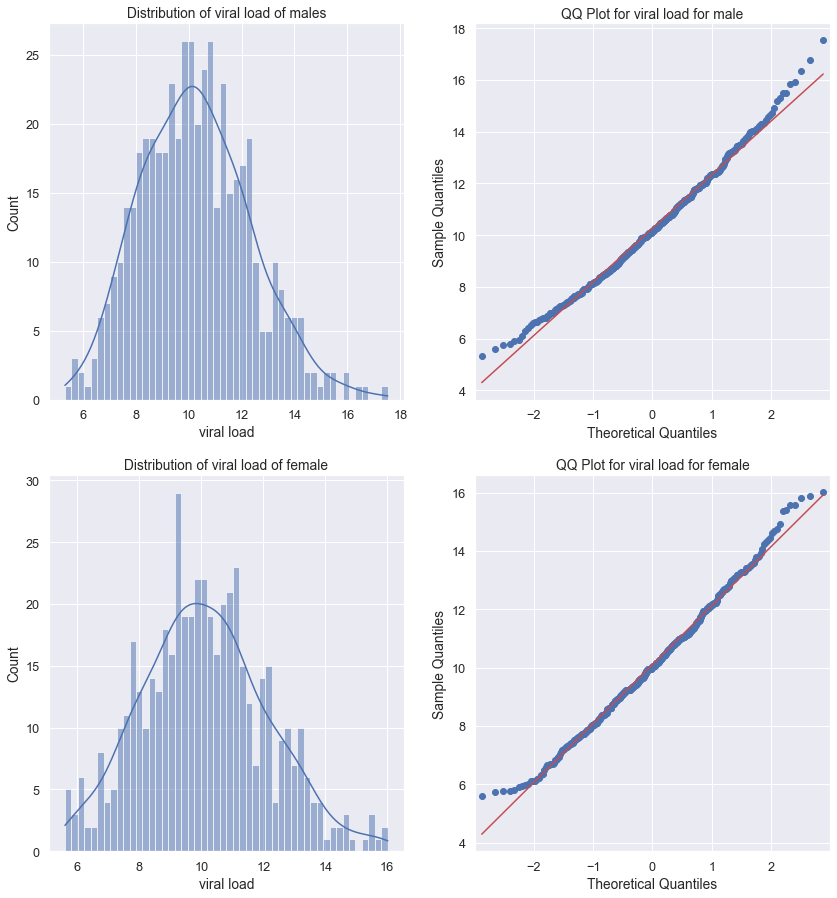

In [123]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14,4))
fig.subplots_adjust(top=3)

# male data
sns.histplot(data=male_data,x='viral load',bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of viral load of males')
sm.qqplot(male_data['viral load'], line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for viral load for male')

# female data
sns.histplot(data=female_data,x='viral load',bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of viral load of female')
sm.qqplot(female_data['viral load'], line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for viral load for female')

plt.show()

In [125]:
# Levene's Test
stats.levene(male_data['viral load'], female_data['viral load'])

LeveneResult(statistic=0.288238963074188, pvalue=0.5914709240652388)

In [126]:
# shapiro-wilk Test
stats.shapiro(male_data['viral load'])

ShapiroResult(statistic=0.9915743470191956, pvalue=0.006134314928203821)

In [127]:
# shapiro-wilk Test
stats.shapiro(female_data['viral load'])

ShapiroResult(statistic=0.9930605292320251, pvalue=0.02078247256577015)

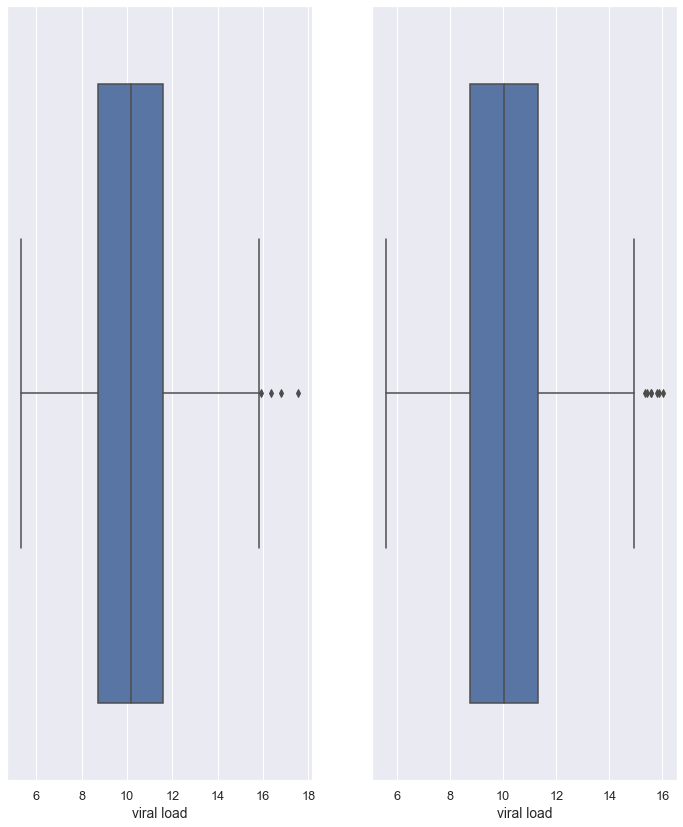

In [128]:
#Box plot for detecting outliers

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=male_data, x="viral load", ax=axis[0])
sns.boxplot(data=female_data, x="viral load", ax=axis[1])
plt.show()

In [134]:
# treating Outliers
def treat_outliers(variable):
    #take two parameters:
    q1,q3=np.percentile(variable,[25,75])
    iqr=q3-q1
    low_range=q1-(2*iqr)
    high_range=q3+(2*iqr)
    return low_range,high_range

In [135]:
req_col=[male_data['viral load'],female_data['viral load']]

for col in req_col:
    ir,ur=treat_outliers(col)
    col=np.where(col>ur,ur,col)
    col=np.where(col<ir,ir,col)

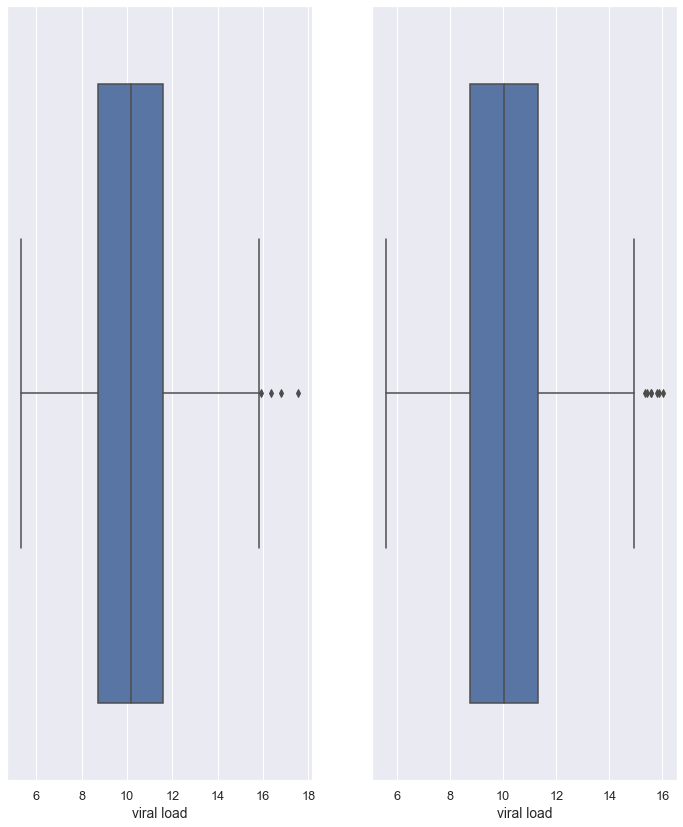

In [136]:
#Box plot for detecting outliers

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=male_data, x="viral load", ax=axis[0])
sns.boxplot(data=female_data, x="viral load", ax=axis[1])
plt.show()

# Observations:

1. Now both the distributions are similar to normal
2. variances are equal by levene test.
3. According to Shapiro wilk test both the data come from normal distribution of data due to p value is less than 0.5
3. now we are ready to apply T test on data.

# testing

In [138]:
t_test1, p_value1 = stats.ttest_ind(male_data['viral load'], female_data['viral load'],alternative='two-sided')
t_test1, p_value1

(1.2209322164930099, 0.22240005203103796)

In [140]:
HTResult(p_value1)

Fail to Reject NULL HYPOTHESIS


# Conclusion:

* Thus p-value > significance level(0.05) we fail to reject H0
* Thus viral load of male and female are same.

# Is the proportion of smoking significantly different across different regions? (Chi-square)


# Step 1: Define Null & Alternate Hypothesis


* H0 : There is No proportion of smoking across Different Regions
* Ha : There is proportion of smoking across Different Regions
* aplha = 0.05


# Step 2: Validate the assumptions


* Both variables are categorical.
* All observations are independent.
* Cells in the contingency table are mutually exclusive.


In [181]:
df1=pd.crosstab(df['region'],df['smoker'],margins=True,margins_name='Total')
df1

smoker,no,yes,Total
region,,,
northeast,257,67,324
northwest,267,58,325
southeast,273,91,364
southwest,267,58,325
Total,1064,274,1338


In [150]:
df.groupby('region')['smoker'].describe()

,count,unique,top,freq
region,,,,
northeast,324,2,no,257
northwest,325,2,no,267
southeast,364,2,no,273
southwest,325,2,no,267


In [182]:
stat, p_value, dof, expected = stats.chi2_contingency(df1)
stat, p_value, dof, expected

(7.34347776140707,
 0.5000675325877666,
 8,
 array([[ 257.65022422,   66.34977578,  324.        ],
        [ 258.44544096,   66.55455904,  325.        ],
        [ 289.45889387,   74.54110613,  364.        ],
        [ 258.44544096,   66.55455904,  325.        ],
        [1064.        ,  274.        , 1338.        ]]))

In [183]:
HTResult(p_value)

Fail to Reject NULL HYPOTHESIS


# Conclusion:

* Thus p-value > significance level(0.05) ,we fail to reject H0
* Thus there is No proportion of smoking across Different Regions

# Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)


# Step 1: Define Null & Alternate Hypothesis


* H0 : mean viral load of female with severity level 0,1,2 are same
* Ha : mean viral load of female with severity level 0,1,2 are not same
* aplha = 0.05


# Step 2: Validate the assumptions


*  Normality – that each sample is taken from a normally distributed population
*  Sample independence – that each sample has been drawn independently of the other samples
*  Variance equality – that the variance of data in the different groups should be the same
*  Your dependent variable – here, “count”, should be continuous – that is, measured on a scale which can be subdivided        using increments


In [188]:
# taking only Female data from Full dataset
female_data = df[df['sex'] == 'female']
female_data

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
5,31,female,no,southeast,8.58,0,9392
6,46,female,no,southeast,11.15,1,20601
7,37,female,no,northwest,9.25,3,18204
9,60,female,no,northwest,8.61,0,72308
...,...,...,...,...,...,...,...
1332,52,female,no,southwest,14.90,3,28529
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [210]:
# consider sample(because it will return a list which we can use in one way Anova Testing)
severity_0=female_data[female_data['severity level']==0]['viral load'].sample(100)
severity_1=female_data[female_data['severity level']==1]['viral load'].sample(100)
severity_2=female_data[female_data['severity level']==2]['viral load'].sample(100)

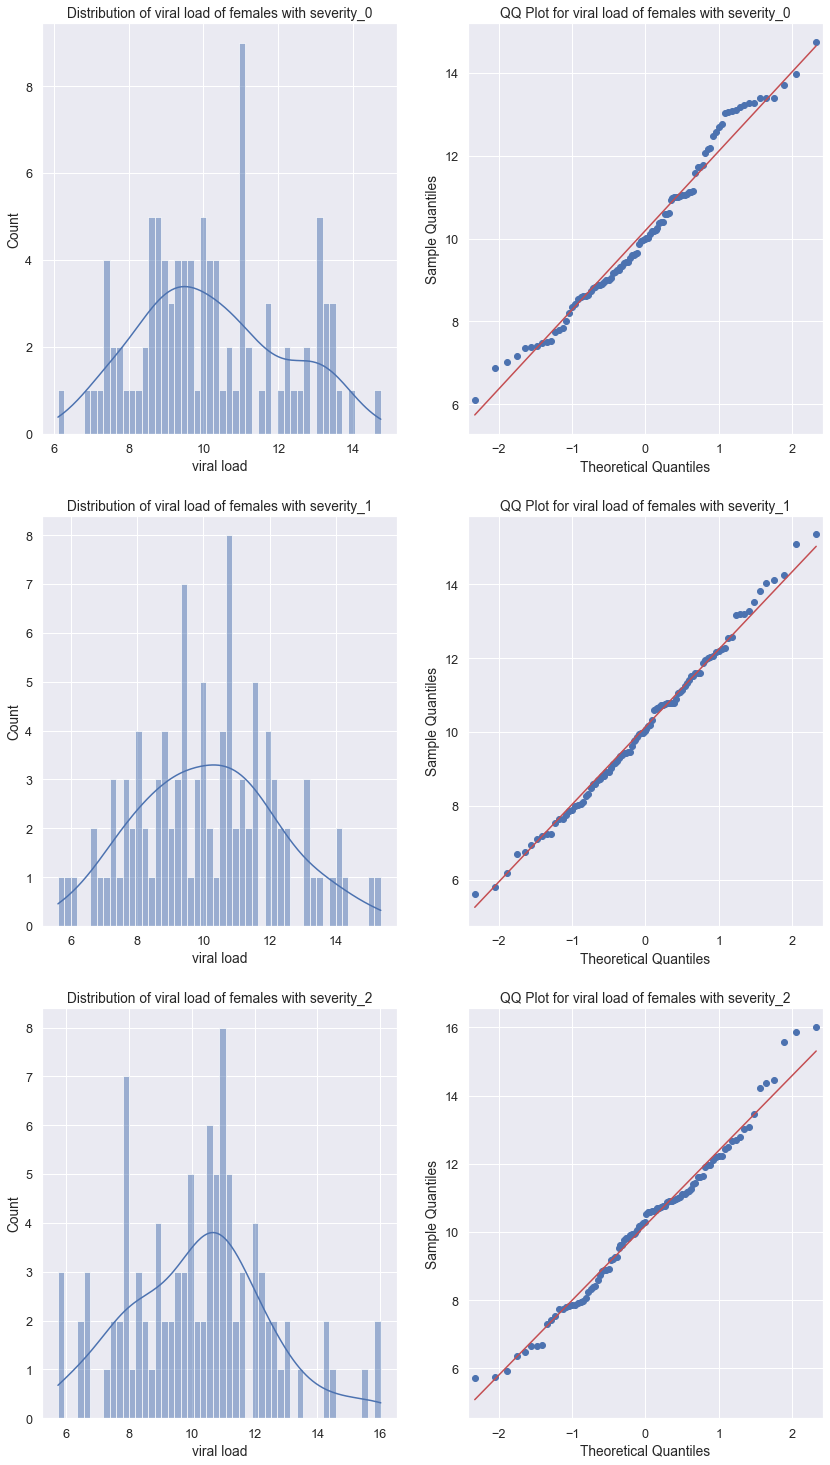

In [209]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14,5))
fig.subplots_adjust(top=4)

# severity_0
sns.histplot(data=severity_0,bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of viral load of females with severity_0')
sm.qqplot(severity_0, line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for viral load of females with severity_0')

# severity_0
sns.histplot(data=severity_1,bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of viral load of females with severity_1')
sm.qqplot(severity_1, line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for viral load of females with severity_1')

# severity_0
sns.histplot(data=severity_2,bins=50,kde=True,
             ax=axis[2,0]).set_title('Distribution of viral load of females with severity_2')
sm.qqplot(severity_2, line = 's',ax=axis[2,1])
axis[2,1].set_title('QQ Plot for viral load of females with severity_2')


plt.show()

In [224]:
# levene's Test for Variance Checking.
stats.levene(severity_0,severity_1,severity_2)

LeveneResult(statistic=1.4851784142907691, pvalue=0.2281388647734698)

In [225]:
# shapiro-wilk Test for normal Distribution Checking.
stats.shapiro(severity_0)

ShapiroResult(statistic=0.989370584487915, pvalue=0.6139489412307739)

In [226]:
# shapiro-wilk Test for normal Distribution Checking.
stats.shapiro(severity_1)

ShapiroResult(statistic=0.9904831647872925, pvalue=0.7036364674568176)

In [227]:
# shapiro-wilk Test for normal Distribution Checking.
stats.shapiro(severity_2)

ShapiroResult(statistic=0.9887186288833618, pvalue=0.5626010298728943)

# Observations

1. according to Shapiro wilk test all season data does not come from normal distributions of data.
2. variance is not same in all above season datas.
3. According to QQ plot we can tell they are not normal distributions.
4. although our assumptions are wrong lets perform one way Anova Test on data.

# Testing

In [228]:
anova_test, p_value=stats.f_oneway(severity_0,severity_1,severity_2)
anova_test, p_value

(0.13959710946060538, 0.8697655933494524)

In [229]:
HTResult(p_value)

Fail to Reject NULL HYPOTHESIS


# Conclusion:

* Thus p-value > significane value(0.05), we fail to reject H0.
* Thus mean viral load of female with severity level 0,1,2 are same


# Conclusion(Important Observations)


* There are no missing values in Data.
* Two Unique values are present in sex and smoker column and 4 unique region's data is present.
* Sevrity level is divided as 6 severity level based on their condition.
* Age and severity level doesn't have any outliers and viral load and hospitalization charges had some outliers.
* Dataset contains slightly more of male data.
* Majority of patients are non smoker and from SouthEast interms of region according to data.
* If patient smokes then likely that patient Hospitalization charges will be higher.
* If patient age is more then hospitalization charges will be higher and if age increases then hospitilization chargers also increases.
* In NorthEast Region, average of hospitilization charges are slightly more than other regions.
* Hospitalization charges also incrases with severity level increases.
* There is no difference in Average of Hospitilization charges based on gender(it is same in both male and female).
* Severity level is more for smokers comparitive to non smokers.
* Irrespective of region is patient smokes then hospitilization charges are more than non smokers.
* Even in Viral load and agewe can see that in smokers are more affected with more viral load than non smokers.
* Hypothesis Testing insights:
	* The Hospitalization of people who smoke is greater than who doesn't smoke
	* Viral load of male and female are same.
	* There is No proportion of smoking across Different Regions
	* The mean viral load of female with severity level 0,1,2 are same.

# Recommendations

* Try to improve some Facilities like extra beds or rooms in northeast as Average of Hospitalization charges are higher.
* Try to treat More age customers first.
* Try to Allocate the Hospital beds to smoker custmers.
* Try to treat The more Severity level Customers first and others later.
* Increase More beds in SouthEast region as more smoking cases are present.
